# MIT 18.06 Linear Algebra — Lecture 3
## Multiplication and Inverse Matrices
Instructor: Gilbert Strang (Spring 2005)

This notebook follows Lecture 3 of MIT 18.06 and focuses on:

- Understanding matrix multiplication in multiple geometric and algebraic ways
- Interpreting matrix–matrix multiplication as composition of linear transformations
- Distinguishing invertible (non-singular) and non-invertible (singular) matrices
- Understanding what a matrix inverse really means
- Computing inverses using Gauss–Jordan elimination
- Connecting elimination matrices to the identity and inverse

The goal is intuition first, then computation.
All examples are small and visual whenever possible.


#####

## Section 1 — Matrix Multiplication: Four Equivalent Views

In this section we study matrix multiplication, one of the central operations
in linear algebra. Gilbert Strang emphasizes that matrix multiplication is
not just a formula — it has multiple equivalent interpretations.

We will focus on four complementary ways to understand multiplication:

1. Row times column
   Each entry of the product is a dot product between a row and a column.

2. Column picture
   Multiplying A by a vector x forms a linear combination of the columns of A,
   with coefficients given by the entries of x.

3. Row picture
   Each row of A tests the vector x using a dot product, producing one component
   of the output.

4. Composition of linear transformations
   Matrix–matrix multiplication represents applying one linear transformation
   followed by another.

These views describe the same operation, but each highlights a different
geometric or algebraic meaning.

In the following cells, we will verify these interpretations using small,
concrete examples and visualizations.


## Choosing a Concrete Example

To make matrix multiplication as clear as possible, we will work with a small
2×2 matrix and a 2D vector.

Small matrices are ideal because:
- every computation can be checked by hand
- geometric meaning can be visualized in the plane
- the same example can be reused for inverses later

We define:

A as a 2×2 matrix that mixes and stretches vectors
x as a 2D vector with simple integer components

By computing A times x in different ways, we will see that all four
interpretations of multiplication lead to the same result.


## Matrix and Vector Definition

We choose the following matrix and vector:

- The matrix A has two columns, each representing how the basis vectors are
  transformed.
- The vector x provides the coefficients for combining those columns.

We will use this same A and x to explore:
- row-by-column multiplication
- column combinations
- row dot products
- geometric transformations in the plane

Keeping the example fixed allows us to focus on interpretation rather than
changing numbers.


In [3]:
import email.message

import matplotlib.pyplot as plt
import numpy as np

A = np.array([
    [2, 1],
    [1, 3]
])

x = np.array([2, 1])
print("A: ", A)
print("x: ", x)


A:  [[2 1]
 [1 3]]
x:  [2 1]


## Matrix Multiplication — Column Picture

In the column picture, multiplying A by a vector x means forming a linear
combination of the columns of A.

Each entry of x tells us how much of each column to use.

If:
- A has columns c1 and c2
- x = [x1, x2]

Then:
A x = x1 * c1 + x2 * c2

This interpretation is geometric: the result is built by adding scaled columns.


In [7]:
A_c_1 = A[:, 0]
A_c_2 = A[:, 1]
XA = A_c_1 * x[0] + A_c_2 * x[1]

print("C1 of A: ", A_c_1)
print("C2 of A: ", A_c_2)
print("A x: ", XA)

C1 of A:  [2 1]
C2 of A:  [1 3]
A x:  [5 5]


## Matrix Multiplication — Row by Column

The standard definition of matrix multiplication computes each entry
of the product as a dot product between a row of the matrix and the vector.

Each row of A produces one number.

This view emphasizes computation:
- rows act as tests on the input vector
- the output vector is built one component at a time


In [26]:
A_r_1 = A[0, :]
A_r_2 = A[1, :]
A_r_1_x = A_r_1 @ x
A_r_2_x = A_r_1 @ x
AX = A @ x

print("A row 1 @ x: ", A_r_1_x)
print("A row 2 @ x: ", A_r_2_x)
print("A @ x: ", AX)

A row 1 @ x:  5
A row 2 @ x:  5
A @ x:  [5 5]


### Clarifying the Row Picture

It is tempting to think that rows of a matrix "move" a vector, but this is not
what rows do.

In the row picture:
- Columns move space
- Rows measure space

Each row of a matrix takes a dot product with the input vector.
This dot product is a measurement, not a motion.

Conceptually:
- A row does not push, rotate, or stretch the vector
- A row asks: "How much of the vector lies in my direction?"
- The output Ax is the collection of these measurements

This is why rows are called linear functionals.
They test the vector, while columns describe how space is transformed.


## Visualizing the Column Picture

In the column picture, the columns of A act like building blocks.
The vector Ax is formed by adding scaled versions of these columns.

By plotting:
- the columns of A
- the resulting vector Ax

we can see matrix multiplication as geometry in the plane.


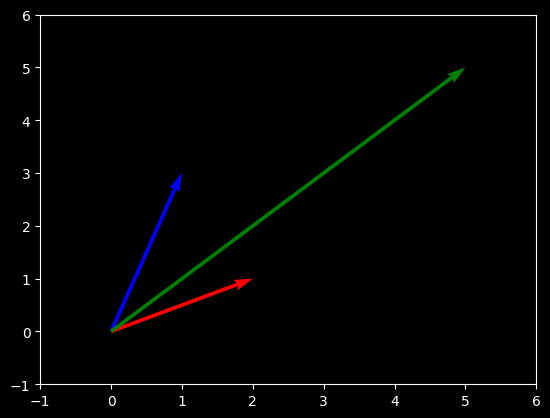

In [24]:
import matplotlib.pyplot as plt

plt.quiver(0, 0, A_c_1[0], A_c_1[1], color='red', angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, A_c_2[0], A_c_2[1], color='blue', angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, AX[0], AX[1], color='green', angles='xy', scale_units='xy', scale=1)
plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.show()

## Matrix Multiplication as Composition of Linear Transformations

Matrix–matrix multiplication represents the composition of linear transformations.

If we have two matrices A and B and a vector x:

- First apply B to x
- Then apply A to the result

This is written as:
A(Bx) = (AB)x

Important consequences:

- Matrix multiplication is associative
- Matrix multiplication is generally NOT commutative
- The order of multiplication matters

From a geometric point of view:
- Each matrix represents a transformation of space
- Multiplying matrices combines transformations
- AB means "do B first, then A"

In the following steps, we will visualize this idea using simple 2D examples.


## Choosing a Second Matrix for Composition

To understand matrix–matrix multiplication as composition, we introduce
a second matrix B.

Matrix B will represent a simple, intuitive transformation so that we can
clearly see the effect of applying transformations in sequence.

The plan is:
- Matrix B will act on a vector first
- Matrix A will act on the result
- We will compare A(Bx) with (AB)x

By keeping the matrices small and interpretable, we can focus on how
composition works rather than on arithmetic complexity.

This will also allow us to visualize how transformations combine and why
the order of multiplication matters.


## Interpreting Matrix B as a Linear Transformation

The matrix B will be chosen to represent a simple and recognizable linear
transformation in the plane.

Rather than thinking of B as a table of numbers, we think of it as an action:

- It takes an input vector and changes its direction and/or length
- It transforms the entire plane in a consistent, linear way

By choosing B carefully, we can:
- Clearly see how B acts on vectors
- Observe how applying A after B changes the result
- Understand why AB means “apply B first, then A”

This interpretation prepares us to visualize matrix–matrix multiplication
as the composition of two linear transformations.


In [31]:
B = np.array([
    [1, 0],
    [0, 1],
    [1, 1]
])
print("B: ", B)
print("------------")
y = B @ x
print("y: ", BX)
print("------------")

C = np.array([
    [2, 0, 0],
    [0, 1, 0],
    [0, 0, 0.5]
])
print("C: ", C)
print("------------")

z = C @ y
print("z: ", z)

B:  [[1 0]
 [0 1]
 [1 1]]
------------
y:  [2 1 3]
------------
C:  [[2.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.  0.5]]
------------
z:  [4.  1.  1.5]


## Composition of Linear Transformations Across Dimensions

In this example, we applied two linear transformations in sequence.

First transformation (B):
- B maps vectors from 2D into 3D.
- It keeps the x and y components of the vector.
- It creates a third coordinate that depends on both x and y.
- Geometrically, B lifts the 2D plane into 3D as a tilted surface.

Second transformation (C):
- C acts entirely within 3D space.
- It stretches the x-direction.
- It leaves the y-direction unchanged.
- It compresses the z-direction.
- This changes the shape of space, not just the vector itself.

The full process is:
- Start with a 2D vector x
- Apply B to embed it into 3D
- Apply C to reshape the 3D space

The final vector is the result of applying these transformations in order.
This illustrates that matrix multiplication represents composition:
doing one transformation first, then another.

Order matters: changing the order would produce a different result.


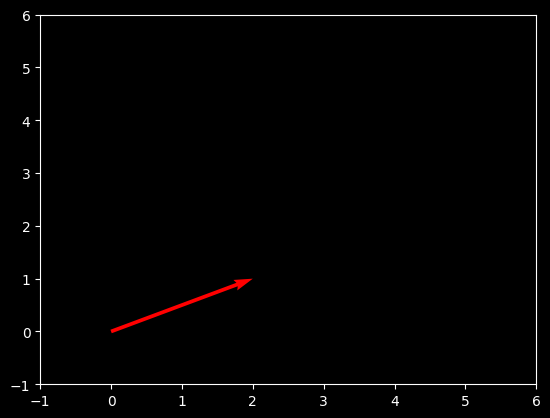

In [39]:
plt.quiver(0, 0, x[0], x[1], scale = 1, angles='xy', scale_units='xy', color='red')
plt.xlim(-1, 6)
plt.ylim(-1, 6)

plt.show()

This was x in 2d space, what will happened next is plotting same x in 3d space with (x[0], x[1], 0), with the other Vectors y and z, y is the result of B @ x, and z is the result of C @ y.

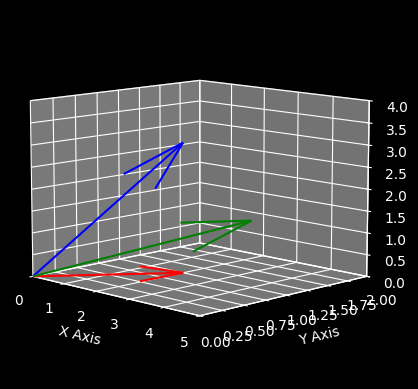

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # Alternative: ax = Axes3D(fig)
ax.view_init(10, -45)
ax.quiver(0, 0, 0, y[0], y[1], y[2], color='blue')
ax.quiver(0, 0, 0, x[0], x[1], 0, color='red')
ax.quiver(0, 0, 0, z[0], z[1], z[2], color='green')
ax.set_xlim(0, 5)
ax.set_ylim(0, 2)
ax.set_zlim(0, 4)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
plt.show()

## Combining Transformations into a Single Matrix

So far, we applied two linear transformations in sequence:

1. Matrix B mapped vectors from 2D space into 3D space.
2. Matrix C then transformed vectors within the same 3D space.

This two-step process can be written as:
- first apply B to x
- then apply C to the result

Matrix multiplication allows us to combine these two steps into a single matrix.

The combined matrix is defined as:
- D = C @ B

This new matrix D represents the entire transformation at once.
It maps vectors directly from 2D into 3D, producing the same result as
applying B first and then C.

In other words:
- D x = C (B x)

This shows that matrix–matrix multiplication is not just a numerical operation.
It is a way to compose linear transformations and keep track of how spaces
and vectors change step by step.

The order of multiplication matters, because each matrix expects vectors
from a specific space.


In [71]:
print("Shape of B: ", B.shape)
print("Shape of C: ", C.shape)
print("------------")

D = C @ B
print("Shape of D: ", D.shape)
print("D: ", D)
print("------------")

z2 = D @ x
print("Shape of z2: ", z2)
print("z2: ", z2)

Shape of B:  (3, 2)
Shape of C:  (3, 3)
------------
Shape of D:  (3, 2)
D:  [[2.  0. ]
 [0.  1. ]
 [0.5 0.5]]
------------
Shape of z2:  [4.  1.  1.5]
z2:  [4.  1.  1.5]


## Inverse Matrices — What Does an Inverse Mean?

An inverse matrix represents the idea of undoing a linear transformation.

If a matrix A transforms vectors in some way, its inverse A_inv reverses
that transformation.

Applying A and then A_inv returns the original vector.
Applying A_inv and then A also returns the original vector.

This is expressed by the identity matrix I:

- A_inv @ A = I
- A @ A_inv = I

Only certain matrices have inverses.
These matrices are called invertible or non-singular.


## How We Will Study Inverse Matrices

We will study inverse matrices in two stages.

First, we treat the inverse as a given object.
We compute it using a built-in method and focus on understanding:
- what the inverse does
- how it undoes a transformation
- when an inverse exists
- when an inverse cannot exist

Only after building this intuition will we compute the inverse ourselves.

In the second stage, we will construct the inverse using Gauss–Jordan
elimination by working with the augmented matrix [A | I] and applying
row operations until we obtain [I | A_inv].

This mirrors the approach used in MIT 18.06.


In [73]:
print("x: ", x)
print("---------")

A = np.array([
    [2, 1],
    [1, 1]
])
print("A: ", A)
print("---------")
y = A @ x
print("y: ", y)
print("---------")

y_inv = np.linalg.inv(A)
print("y_inv: ", y_inv)
print("---------")

x_recovered = y_inv @ y
print("x_recovered: ", x_recovered)


x:  [2 1]
---------
A:  [[2 1]
 [1 1]]
---------
y:  [5 3]
---------
y_inv:  [[ 1. -1.]
 [-1.  2.]]
---------
x_recovered:  [2. 1.]


## Inverse Matrix as an Undoing Transformation

We applied the matrix A to a vector x and obtained a new vector y.

This transformation:
- mixed the x and y components
- changed the direction and length of the vector
- reshaped the space in a reversible way

We then computed the inverse matrix A_inv and applied it to y.

The result was the original vector x.

This demonstrates the meaning of an inverse matrix:
- A transforms the space
- A_inv reverses that transformation

Geometrically, the inverse matrix is not just a numerical operation.
It is a transformation that undoes the effect of A on the entire space.

Applying A followed by A_inv returns every vector to its original position.


## The Identity Matrix

The identity matrix represents the transformation that does nothing.

Applying the identity matrix to a vector leaves the vector unchanged.
It does not stretch, rotate, mix, or move the vector.

In matrix terms:
- I @ x = x for every vector x

For inverse matrices, the identity plays a central role.
If A_inv is the inverse of A, then:

- A_inv @ A = I
- A @ A_inv = I

This means that applying A and then A_inv returns the space to its original state.


In [75]:
A_inv = np.linalg.inv(A)
I = A @ A_inv
II = A_inv @ A

print("I: ", I)
print("---------")
print("II: ", II)
print("---------")

I:  [[1. 0.]
 [0. 1.]]
---------
II:  [[1. 0.]
 [0. 1.]]
---------


## Singular Matrices and the Failure of Inverses

Not every matrix has an inverse.

A matrix is called singular if it does not have an inverse.
Geometrically, this happens when the matrix collapses space in a way
that cannot be undone.

If a transformation sends different vectors to the same result,
there is no way to uniquely recover the original vector.
Undoing the transformation becomes impossible.

In this section, we examine a singular matrix and observe
how and why inversion fails.


In [82]:
S = np.array([
    [2, 4],
    [1, 2]
])
print("S: ", S)
print("---------")

try:
    np.linalg.inv(S)
except Exception as e:
    print("We can not inverse S because it is: ", e)


S:  [[2 4]
 [1 2]]
---------
We can not inverse S because it is:  Singular matrix


## Why a Singular Matrix Has No Inverse

The matrix S is singular because its columns are linearly dependent.

In this case, the second column is a multiple of the first.
This means the columns do not span the entire 2D plane.

Geometrically, applying S collapses the 2D plane into a 1D line.
Different input vectors are mapped to the same output vector.

Because information is lost during this transformation, it is impossible
to uniquely recover the original vector from the result.

An inverse matrix would need to undo the transformation for every vector.
Since multiple vectors produce the same output, this is impossible.

This is why singular matrices do not have inverses.
The failure is geometric and fundamental, not a numerical issue.


## Gauss–Jordan Elimination and the Inverse Matrix

Gauss–Jordan elimination is a method for computing the inverse of a matrix
using row operations.

The key idea is to work with an augmented matrix [A | I].

By applying row operations:
- we transform A into the identity matrix I
- the same operations transform I into the inverse of A

At the end of the process, we obtain:
[A | I] → [I | A_inv]

This method shows that the inverse matrix is built entirely from
elimination operations.


In [106]:
I = np.array([
    [1.0, 0.0],
    [0.0, 1.0]
])

A_stack_I = np.column_stack((A, I))
print("[A | I]: ", A_stack_I)
print("------------")



[A | I]:  [[2. 1. 1. 0.]
 [1. 1. 0. 1.]]
------------


## First Gauss–Jordan Step: Normalize the First Pivot

Gauss–Jordan elimination works by turning the matrix A into the identity matrix.

The first pivot is the top-left entry of A.
To match the identity matrix, this pivot must be equal to 1.

If the pivot is not 1, we scale the entire row by dividing by the pivot value.
The same operation is applied to both sides of the augmented matrix.


In [107]:
A_stack_I[0] = A_stack_I[0] / 2
print("[A | I]: ", A_stack_I)

[A | I]:  [[1.  0.5 0.5 0. ]
 [1.  1.  0.  1. ]]


## Second Gauss–Jordan Step: Eliminate Below the First Pivot

After normalizing the first pivot to 1, the next goal is to eliminate
all other entries in the same column.

To match the identity matrix, all entries below and above the pivot
must be zero.

We eliminate the entry below the first pivot using a row operation.
The same operation is applied to both sides of the augmented matrix.


In [108]:
A_stack_I[1] = A_stack_I[1] - A_stack_I[0]
print("[A | I]: ", A_stack_I)

[A | I]:  [[ 1.   0.5  0.5  0. ]
 [ 0.   0.5 -0.5  1. ]]


## Third Gauss–Jordan Step: Normalize the Second Pivot

The second pivot is the diagonal entry in the second row.

To match the identity matrix, this pivot must be equal to 1.
If it is not 1, we scale the entire row accordingly.

This operation is applied to both sides of the augmented matrix.


In [109]:
A_stack_I[1] = A_stack_I[1] / 0.5
print("[A | I]: ", A_stack_I)

[A | I]:  [[ 1.   0.5  0.5  0. ]
 [ 0.   1.  -1.   2. ]]


## Final Gauss–Jordan Step: Eliminate Above the Second Pivot

At this stage, the left side of the augmented matrix is almost the identity.

The last remaining nonzero entry is above the second pivot.
To complete the identity matrix, this entry must be eliminated.

We use a row operation to eliminate the value above the pivot.
The same operation is applied to both sides of the augmented matrix.


In [110]:
A_stack_I[0] = A_stack_I[0] - 0.5 * A_stack_I[1]
print("[A | I]: ", A_stack_I)

[A | I]:  [[ 1.  0.  1. -1.]
 [ 0.  1. -1.  2.]]


Based on the result:

In [111]:
A_inv = np.array([
    [1, -1],
    [-1, 2]
])
print("A_inv: ", A_inv)
print("----------")

A_inv_checked = np.linalg.inv(A)
print("A_inv_checked: ", A_inv_checked)

A_inv:  [[ 1 -1]
 [-1  2]]
----------
A_inv_checked:  [[ 1. -1.]
 [-1.  2.]]
